## Pandas 基礎

In [1]:
import datetime

import pandas as pd
import pandas.io.data
from pandas import Series, DataFrame
pd.__version__

C:\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


u'0.17.1'

In [26]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

Populating the interactive namespace from numpy and matplotlib


'1.5.0'

## 建立/讀取時間序列

### 從Python 的資料結構

In [3]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series([1, 2, 3, 4, 5], index=labels)
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [4]:
'b' in s

True

In [5]:
s['b']

2

In [6]:
mapping = s.to_dict()
mapping

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [7]:
Series(mapping)

a    1
b    2
c    3
d    4
e    5
dtype: int64

### 從 Yahoo finance

In [8]:
tw2330 = pd.io.data.get_data_yahoo('2330.TW', 
                                 start=datetime.datetime(2006, 10, 1), 
                                 end=datetime.datetime(2012, 1, 1))
tw2330.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,59.5025,60.1991,59.2040,59.9005,44461200,42.0934
2006-10-03,59.7015,60.0000,59.3035,59.7015,31307700,41.9536
2006-10-04,59.7015,59.7015,58.2090,58.2090,46544900,40.9047
2006-10-05,59.3035,60.4976,59.3035,60.3981,44810700,42.4430
2006-10-11,60.3981,60.5971,60.0995,60.2986,37896100,42.3731


## Series and DataFrame

* Indexing
* Slicing
* Creating new columns

In [9]:
ts = tw2330['Close'][-10:]
ts

Date
2011-12-19    72.5
2011-12-20    72.8
2011-12-21    76.0
2011-12-22    75.0
2011-12-23    75.4
2011-12-26    75.0
2011-12-27    75.5
2011-12-28    75.7
2011-12-29    75.8
2011-12-30    75.8
Name: Close, dtype: float64

A DataFrame is a collection of Series objects. Slicing out a DataFrame column returns a Series.

In [10]:
type(ts)

pandas.core.series.Series

In [11]:
date = ts.index[5]
date

Timestamp('2011-12-26 00:00:00')

In [12]:
ts[date]

75.0

In [13]:
ts[5]

75.0

### 選擇多個欄位

In [47]:
tw2330[['Open', 'Close']].head()

,Open,Close
Date,,
2006-10-02,59.5025,59.9005
2006-10-03,59.7015,59.7015
2006-10-04,59.7015,58.2090
2006-10-05,59.3035,60.3981
2006-10-11,60.3981,60.2986


New columns can be added on the fly.

In [48]:
tw2330['diff'] = tw2330.Open - tw2330.Close
tw2330.head()

,Open,High,Low,Close,Volume,Adj Close,diff
Date,,,,,,,
2006-10-02,59.5025,60.1991,59.2040,59.9005,44461200,42.0934,-0.3980
2006-10-03,59.7015,60.0000,59.3035,59.7015,31307700,41.9536,0.0000
2006-10-04,59.7015,59.7015,58.2090,58.2090,46544900,40.9047,1.4925
2006-10-05,59.3035,60.4976,59.3035,60.3981,44810700,42.4430,-1.0946
2006-10-11,60.3981,60.5971,60.0995,60.2986,37896100,42.3731,0.0995


### 刪除欄位

In [49]:
del tw2330['diff']
tw2330.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,59.5025,60.1991,59.2040,59.9005,44461200,42.0934
2006-10-03,59.7015,60.0000,59.3035,59.7015,31307700,41.9536
2006-10-04,59.7015,59.7015,58.2090,58.2090,46544900,40.9047
2006-10-05,59.3035,60.4976,59.3035,60.3981,44810700,42.4430
2006-10-11,60.3981,60.5971,60.0995,60.2986,37896100,42.3731


## 常見金融計算

* Moving Average
* Returns

In [50]:
close_px = tw2330['Adj Close']

In [51]:
mavg = pd.rolling_mean(close_px, 40)
mavg[-10:]

Date
2011-12-19    63.423700
2011-12-20    63.451507
2011-12-21    63.539210
2011-12-22    63.605522
2011-12-23    63.654720
2011-12-26    63.684667
2011-12-27    63.721032
2011-12-28    63.759535
2011-12-29    63.808735
2011-12-30    63.834405
Name: Adj Close, dtype: float64

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [52]:
rets = close_px / close_px.shift(1) - 1
rets.head()

Date
2006-10-02         NaN
2006-10-03   -0.003321
2006-10-04   -0.025001
2006-10-05    0.037607
2006-10-11   -0.001647
Name: Adj Close, dtype: float64

Or alternatively `.pct_change()`.

In [53]:
close_px.pct_change().head()

Date
2006-10-02         NaN
2006-10-03   -0.003321
2006-10-04   -0.025001
2006-10-05    0.037607
2006-10-11   -0.001647
Name: Adj Close, dtype: float64

## 資料視覺化

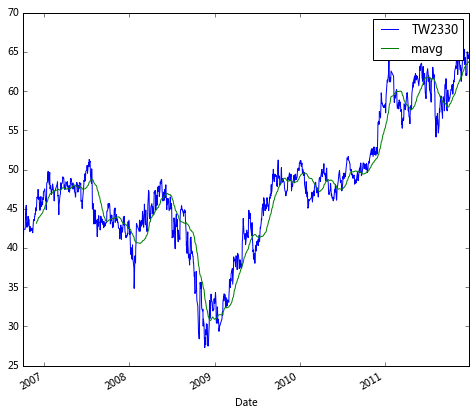

In [54]:
close_px.plot(label='TW2330')
mavg.plot(label='mavg')
plt.legend()

## 計算股票關聯性

In [55]:
df = pd.io.data.get_data_yahoo(['2330.TW', '2454.TW', '2498.TW', '3003.TW','1101.TW',\
                                '1102.TW'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
df.head()

,1101.TW,1102.TW,2330.TW,2454.TW,2498.TW,3003.TW
Date,,,,,,
2010-01-01,23.52444,22.51600,50.8372,429.0592,NaN,21.83550
2010-01-04,23.73198,22.48347,51.1525,435.9795,282.5463,21.94709
2010-01-05,24.56220,22.97155,50.8372,436.7484,287.5715,21.35191
2010-01-06,25.08112,23.13420,51.1525,442.1309,288.7305,21.94709
2010-01-07,24.59682,22.87396,50.6007,431.3660,276.7483,21.31477


In [56]:
rets = df.pct_change()

In [57]:
rets.head()

,1101.TW,1102.TW,2330.TW,2454.TW,2498.TW,3003.TW
Date,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.008822,-0.001445,0.006202,0.016129,NaN,0.005110
2010-01-05,0.034983,0.021708,-0.006164,0.001764,0.017785,-0.027119
2010-01-06,0.021127,0.007080,0.006202,0.012324,0.004030,0.027875
2010-01-07,-0.019309,-0.011249,-0.010787,-0.024348,-0.041500,-0.028811


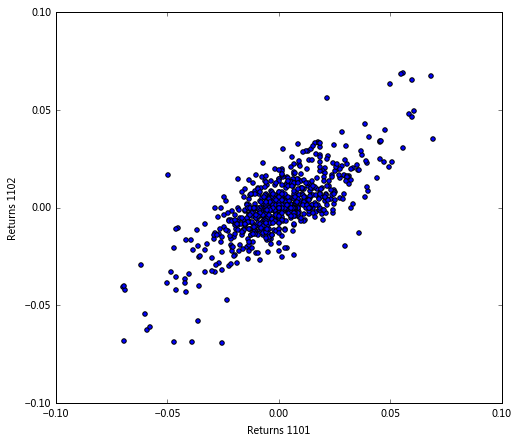

In [58]:
plt.scatter(rets['1101.TW'], rets['1102.TW'])
plt.xlabel('Returns 1101')
plt.ylabel('Returns 1102')

In [44]:
corr = rets.corr()
corr

,1101.TW,1102.TW,2330.TW,2454.TW,2498.TW,3003.TW
1101.TW,1.000000,0.762678,0.374135,0.270248,0.277767,0.304631
1102.TW,0.762678,1.000000,0.433379,0.291028,0.298980,0.333606
2330.TW,0.374135,0.433379,1.000000,0.348264,0.291772,0.263730
2454.TW,0.270248,0.291028,0.348264,1.000000,0.319448,0.289530
2498.TW,0.277767,0.298980,0.291772,0.319448,1.000000,0.281049
3003.TW,0.304631,0.333606,0.263730,0.289530,0.281049,1.000000


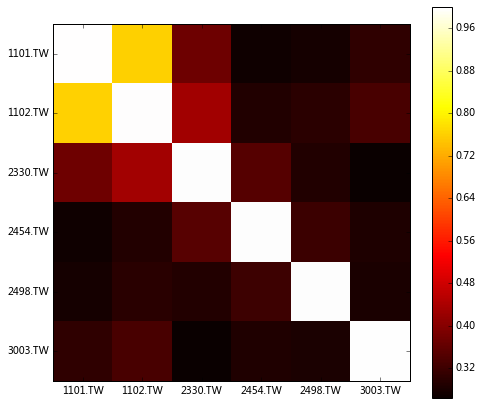

In [45]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

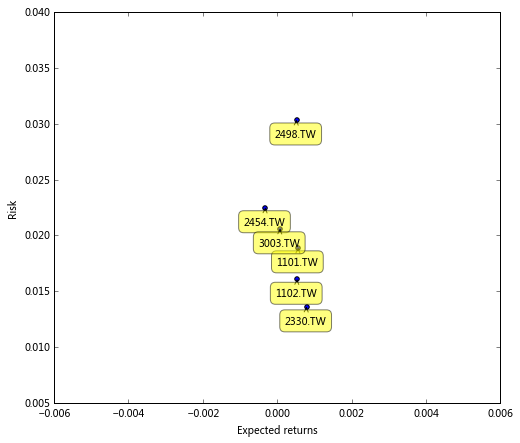

In [46]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))